По материалам - https://github.com/pytorch/tutorials/blob/main/_static/torchvision_finetuning_instance_segmentation.ipynb

In [1]:
!pip install torch==1.13.1 torchvision==0.14.1 torchaudio==0.13.1 torchdata==0.5.1 torchtext==0.14.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 50.1 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.1.0+cu121
    Uninstalling torch-2.1.0+cu121:
      Successfully uninstalled torch-2.1.0+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.16.0+cu121
    Uninstal

In [3]:
!pip install opencv-python

  Using cached opencv_python-4.9.0.80-cp37-abi3-macosx_11_0_arm64.whl.metadata (20 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-macosx_11_0_arm64.whl (35.4 MB)


In [15]:
!pip install fastai

  Using cached fastai-2.7.14-py3-none-any.whl.metadata (9.1 kB)
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached PyYAML-6.0.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (2.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 739.0 kB/s eta 0:00:00 0:00:01
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached wasabi-1.1.2-py3-none-any.whl.metadata (28 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.3.4-py3-none-any.whl.metadata (4.7 kB)
  Using cached smart_open-6.4.0-py3-none-any.whl.metadata (21 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.1 MB/s eta 0:00:00
  Using cached charset_normalizer-3.3.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (33 kB)
  Using cached idna-3.6-py3-none-any.whl.metadata (9.9 kB)
  Using cached certifi-2024.2.2-py3-none-any.whl.metadata (2.2 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached 

## Получение данных

In [4]:
import os

In [ ]:
#Create new directory and add model images to it.
os.mkdir('content')
os.chdir('content')

In [ ]:
%%capture

#Download processed data from Roboflow.
!curl -L "{https://app.roboflow.com/ds/jGCiAQzrvI?key=ZmR7CmNT98}" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [16]:
from PIL import Image
import json

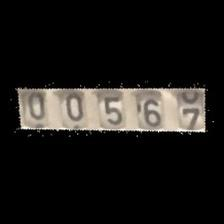

In [20]:
Image.open('WaterMeters_digits/test/id_1011_value_567_0_jpg.rf.91269a32b9276799a2872f55b885227d.jpg')

In [21]:
f = open('WaterMeters_digits/test/_annotations.coco.json')
anns = json.load(f)

In [22]:
anns.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

In [23]:
anns['categories']

[{'id': 0, 'name': 'numbers', 'supercategory': 'none'},
 {'id': 1, 'name': '0', 'supercategory': 'numbers'},
 {'id': 2, 'name': '1', 'supercategory': 'numbers'},
 {'id': 3, 'name': '2', 'supercategory': 'numbers'},
 {'id': 4, 'name': '3', 'supercategory': 'numbers'},
 {'id': 5, 'name': '4', 'supercategory': 'numbers'},
 {'id': 6, 'name': '5', 'supercategory': 'numbers'},
 {'id': 7, 'name': '6', 'supercategory': 'numbers'},
 {'id': 8, 'name': '7', 'supercategory': 'numbers'},
 {'id': 9, 'name': '8', 'supercategory': 'numbers'},
 {'id': 10, 'name': '9', 'supercategory': 'numbers'}]

In [27]:
anns['images'][54]

{'id': 54,
 'license': 1,
 'file_name': 'id_1219_value_54_372_jpg.rf.f6a2f266b386b21d44104b52024975eb.jpg',
 'height': 224,
 'width': 224,
 'date_captured': '2021-11-28T16:57:44+00:00'}

In [26]:
for num, minidict in enumerate(anns['images']):
    if 'id_1219_value_54_372_jpg.rf.f6a2f266b386b21d44104b52024975eb.jpg' in minidict['file_name']:
        print(num)

54


In [28]:
anns['annotations'][54]

{'id': 54,
 'image_id': 6,
 'category_id': 7,
 'bbox': [168, 89, 21.16279069767441, 43.25581395348837],
 'area': 915.4137371552187,
 'segmentation': [],
 'iscrowd': 0}

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from fastai.vision.all import *

In [18]:
# load the train.json file and return the images' filename and
# boundinging boxes and labels
imgs, lbl_bbox = get_annotations('WaterMeters_digits/test/_annotations.coco.json')

In [30]:
lbl_bbox[54]

([[8, 90, 25.209302325581397, 126.74418604651163],
  [34, 89, 53.30232558139535, 125.9767441860465],
  [60, 89, 78.13953488372093, 124.58139534883722],
  [89, 89, 107.13953488372094, 126.44186046511628],
  [114, 89, 131.20930232558138, 125.51162790697676],
  [142, 89, 159.67441860465118, 127.13953488372093],
  [170, 88, 185.58139534883722, 124.27906976744187],
  [197, 88, 220.02325581395348, 129.3953488372093]],
 ['0', '0', '0', '5', '4', '3', '7', '2'])

In [ ]:
imgs

In [ ]:
import os
import numpy as np
import torch
import torch.utils.data
from PIL import Image


class PennFudanDataset(torch.utils.data.Dataset):
    def __init__(self, root, transforms=None):
        self.root = root
        self.transforms = transforms
        self.imgs, self.lbl_bbox = get_annotations(os.path.join(self.root, '_annotations.coco.json'))

    def __getitem__(self, idx):
        img_path = self.imgs[idx]
        img = Image.open(os.path.join(self.root, img_path)).convert("RGB")
        boxes, labels = self.lbl_bbox[idx]
        labels = [int(el)+1 for el in labels]
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        masks = torch.zeros((len(boxes), 224, 224))

        image_id = torch.tensor([idx])
        iscrowd = torch.zeros((len(boxes),), dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["masks"] = masks
        target["image_id"] = image_id
        target["iscrowd"] = iscrowd

        if self.transforms is not None:
            img = self.transforms(img)

        return img, target

    def __len__(self):
        return len(self.imgs)

In [ ]:
imgs[0]

'id_14_value_14_954.rf.04cd007d4031de5bd4e257f582774ac7.jpg'

In [ ]:
lbl_bbox

In [31]:
picpic = cv2.imread('WaterMeters_digits/test/id_1219_value_54_372_jpg.rf.f6a2f266b386b21d44104b52024975eb.jpg')

In [32]:
pic_box = np.array(anns['annotations'][54]['bbox'])

In [33]:
anns['annotations'][54]

{'id': 54,
 'image_id': 6,
 'category_id': 7,
 'bbox': [168, 89, 21.16279069767441, 43.25581395348837],
 'area': 915.4137371552187,
 'segmentation': [],
 'iscrowd': 0}

In [34]:
lbl_bbox[54]

([[8, 90, 25.209302325581397, 126.74418604651163],
  [34, 89, 53.30232558139535, 125.9767441860465],
  [60, 89, 78.13953488372093, 124.58139534883722],
  [89, 89, 107.13953488372094, 126.44186046511628],
  [114, 89, 131.20930232558138, 125.51162790697676],
  [142, 89, 159.67441860465118, 127.13953488372093],
  [170, 88, 185.58139534883722, 124.27906976744187],
  [197, 88, 220.02325581395348, 129.3953488372093]],
 ['0', '0', '0', '5', '4', '3', '7', '2'])

In [35]:
pic_box

array([168.        ,  89.        ,  21.1627907 ,  43.25581395])

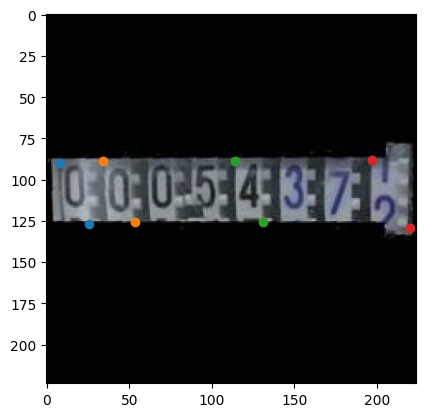

In [38]:
plt.imshow(picpic)
plt.scatter(np.array(lbl_bbox[54][0][0])[[0, 2]], np.array(lbl_bbox[54][0][0])[[1, 3]])
plt.scatter(np.array(lbl_bbox[54][0][1])[[0, 2]], np.array(lbl_bbox[54][0][1])[[1, 3]])
plt.scatter(np.array(lbl_bbox[54][0][4])[[0, 2]], np.array(lbl_bbox[54][0][4])[[1, 3]])
plt.scatter(np.array(lbl_bbox[54][0][7])[[0, 2]], np.array(lbl_bbox[54][0][7])[[1, 3]])

In [ ]:
%%shell

# Download TorchVision repo to use some files from
# references/detection
git clone https://github.com/pytorch/vision.git
cd vision
git checkout v0.8.2

cp references/detection/utils.py ../
cp references/detection/transforms.py ../
cp references/detection/coco_eval.py ../
cp references/detection/engine.py ../
cp references/detection/coco_utils.py ../

Cloning into 'vision'...
remote: Enumerating objects: 351234, done.
remote: Counting objects: 100% (1478/1478), done.
remote: Compressing objects: 100% (230/230), done.
remote: Total 351234 (delta 1292), reused 1378 (delta 1238), pack-reused 349756
Receiving objects: 100% (351234/351234), 704.98 MiB | 14.51 MiB/s, done.
Resolving deltas: 100% (323819/323819), done.
Note: switching to 'v0.8.2'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 2f40a483d7 [v0.8.X] .circleci: Add Python 3.9 to CI (#3063)


## Модели

In [ ]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

In [ ]:
! ls

detection_model.pth  README.roboflow.txt  train
README.dataset.txt   test		  valid


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model = torch.load('/content/drive/MyDrive/Colab Notebooks/Netology/detection_model.pth')
model.eval()

In [ ]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# load a model pre-trained pre-trained on COCO
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# replace the classifier with a new one, that has
# num_classes which is user-defined
num_classes = 11  # 10 digits + background
# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features
# replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

In [ ]:
model

In [ ]:
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator


backbone = torchvision.models.mobilenet_v2(pretrained=True).features
backbone.out_channels = 1280

anchor_generator = AnchorGenerator(sizes=((32, 64, 128, 256, 512),),
                                   aspect_ratios=((0.5, 1.0, 2.0),))
roi_pooler = torchvision.ops.MultiScaleRoIAlign(featmap_names=[0],
                                                output_size=7,
                                                sampling_ratio=2)
model = FasterRCNN(backbone,
                   num_classes=11,
                   rpn_anchor_generator=anchor_generator,
                   box_roi_pool=roi_pooler)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

In [ ]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor


def get_instance_segmentation_model(num_classes):
    # load an instance segmentation model pre-trained on COCO
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

    # get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # now get the number of input features for the mask classifier
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256
    # and replace the mask predictor with a new one
    model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask,
                                                       hidden_layer,
                                                       num_classes)

    return model

In [ ]:
from engine import train_one_epoch, evaluate
import utils
import transforms as T

In [ ]:
from torchvision.transforms import transforms as T

In [ ]:
from torchvision import transforms

In [ ]:
def get_transform(train):
    transforms = []
    transforms.append(T.ToTensor())
    if train:
        pass
    return T.Compose(transforms)

In [ ]:
def get_transform(train):
    return transforms.Compose([transforms.ToTensor()])

In [ ]:
# use our dataset and defined transformations
dataset = PennFudanDataset('train', get_transform(train=True))
dataset_test = PennFudanDataset('valid', get_transform(train=False))

# split the dataset in train and test set
torch.manual_seed(1)
indices = torch.randperm(len(dataset)).tolist()
dataset = torch.utils.data.Subset(dataset, indices[:-50])
dataset_test = torch.utils.data.Subset(dataset_test, indices[-50:])

# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=2, shuffle=True, num_workers=2,
    collate_fn=utils.collate_fn)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=1, shuffle=False, num_workers=2,
    collate_fn=utils.collate_fn)

## Обучение

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

num_classes = 11

# get the model using our helper function
model = get_instance_segmentation_model(num_classes)
# move model to the right device
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=3,
                                               gamma=0.1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth


  0%|          | 0.00/170M [00:00<?, ?B/s]

In [ ]:
# let's train it for 10 epochs
num_epochs = 10

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()

## Предсказания

In [ ]:
dataset_test = PennFudanDataset('test', get_transform(train=False))

In [ ]:
dataset_test[3]

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

In [ ]:
# pick one image from the test set
img, pred = dataset_test[3]
# put the model in evaluation mode
model.eval()
with torch.no_grad():
    prediction = model([img.to(device)])

In [ ]:
pred['labels'] - 1

tensor([0, 0, 2, 6, 8, 9, 0, 3])

In [ ]:
pred['boxes']

tensor([[ 12.0000,  92.0000,  28.9767, 132.9302],
        [ 39.0000,  93.0000,  58.0698, 133.0000],
        [ 66.0000,  93.0000,  83.2093, 131.8372],
        [ 91.0000,  92.0000, 109.8372, 133.1628],
        [114.0000,  93.0000, 136.3256, 131.8372],
        [142.0000,  92.0000, 163.3954, 133.1628],
        [169.0000,  94.0000, 187.6046, 131.2093],
        [194.0000,  93.0000, 211.9070, 130.9070]])

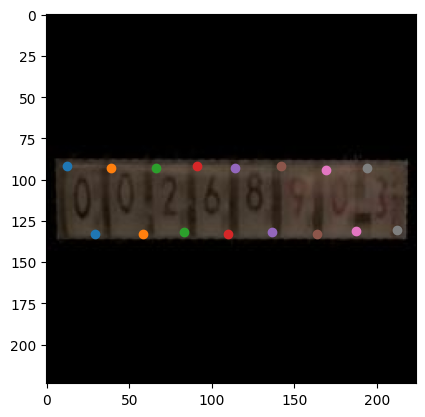

In [ ]:
plt.imshow(img.permute(1, 2, 0))
for x1, y1, x2, y2 in pred['boxes']:
  plt.scatter([x1, x2], [y1, y2])

In [ ]:
boxes = prediction[0]['boxes'].detach().cpu().numpy()[prediction[0]['scores'].detach().cpu().numpy() > 0.8]
labels = prediction[0]['labels'].detach().cpu().numpy()[prediction[0]['scores'].detach().cpu().numpy() > 0.8]

In [ ]:
sort_index = sorted(range(len(boxes)), key=lambda k: boxes[k][0])

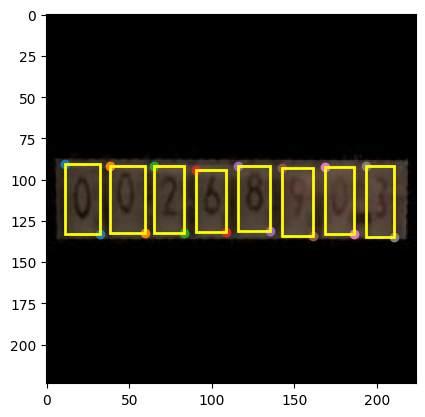

In [ ]:
# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(img.permute(1, 2, 0))

for x1, y1, x2, y2 in boxes[sort_index]:
  plt.scatter([x1, x2], [y1, y2])
  # Create a Rectangle patch
  rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1,
                           linewidth=2, edgecolor='yellow', facecolor='none')

  # Add the patch to the Axes
  ax.add_patch(rect)

plt.show()

In [ ]:
labels[sort_index] - 1

array([0, 0, 2, 6, 8, 9, 0, 3])

In [ ]:
torch.save(model, 'detection_model.pth')

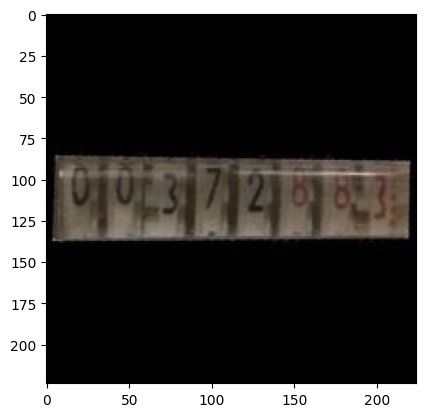

In [ ]:
plt.imshow(img.permute(1, 2, 0))